In [ ]:
# в презентацию
# ссылка на репозиторий
# QR-код на репозиторий

In [54]:
import requests
import json
from tqdm.auto import tqdm
from collections import defaultdict
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
page = 1
num_per_page = 100
area = 113
job=['Аналитик данных']
url = f'https://api.hh.ru/vacancies?text={job}&page={page}&per_page={num_per_page}&area={area}'

In [56]:
res = requests.get(url)

In [57]:
vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

20

In [58]:
v = vacancies.get('items')
v

[{'id': '69487220',
  'premium': False,
  'name': 'Аналитик',
  'department': {'id': '7172-7172-ofis',
   'name': 'Лента, федеральная розничная сеть, Офис'},
  'has_test': False,
  'response_letter_required': False,
  'area': {'id': '2',
   'name': 'Санкт-Петербург',
   'url': 'https://api.hh.ru/areas/2'},
  'salary': {'from': None, 'to': 70000, 'currency': 'RUR', 'gross': True},
  'type': {'id': 'open', 'name': 'Открытая'},
  'address': None,
  'response_url': None,
  'sort_point_distance': None,
  'published_at': '2022-09-23T14:09:01+0300',
  'created_at': '2022-09-23T14:09:01+0300',
  'archived': False,
  'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=69487220',
  'insider_interview': None,
  'url': 'https://api.hh.ru/vacancies/69487220?host=hh.ru',
  'adv_response_url': 'https://api.hh.ru/vacancies/69487220/adv_response?host=hh.ru',
  'alternate_url': 'https://hh.ru/vacancy/69487220',
  'relations': [],
  'employer': {'id': '7172',
   'name': 'Лента, фед

In [59]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [60]:
vacancies = res.json()
num_pages = vacancies.get('pages')
vacancy_ids = [el.get('id') for el in vacancies.get('items')]

In [61]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [62]:
vnum  = vacancies.get('pages')

In [63]:
all_vacancy_ids= []
all_vacancy_items= []
for i in tqdm(range(vnum)):
    url = f'https://api.hh.ru/vacancies?text={job}&page={i}&per_page={num_per_page}&area={area}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_items = res.json().get('items')
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)
    all_vacancy_items.extend(vacancy_items)

  0%|          | 0/20 [00:00<?, ?it/s]

In [65]:
# сохраним json в файл
with open('vacancy_items.json', 'w', encoding='utf-8') as f:
    json.dump(vacancy_items, f, ensure_ascii=False, indent=4)
with open('vacancies.json', 'w', encoding='utf-8') as f:
    json.dump(vacancies, f, ensure_ascii=False, indent=4)

In [66]:
# читаем json из файла
with open('vacancy_items.json', encoding='utf-8') as f:
    vacancy_items = json.load(f)
with open('vacancies.json', encoding='utf-8') as f:
    vacancies = json.load(f)

In [67]:
df = pd.DataFrame(all_vacancy_items)

In [68]:
df.shape

(2000, 29)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        2000 non-null   object
 1   premium                   2000 non-null   bool  
 2   name                      2000 non-null   object
 3   department                316 non-null    object
 4   has_test                  2000 non-null   bool  
 5   response_letter_required  2000 non-null   bool  
 6   area                      2000 non-null   object
 7   salary                    579 non-null    object
 8   type                      2000 non-null   object
 9   address                   1109 non-null   object
 10  response_url              0 non-null      object
 11  sort_point_distance       0 non-null      object
 12  published_at              2000 non-null   object
 13  created_at                2000 non-null   object
 14  archived                

In [70]:
df.head()

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,alternate_url,relations,employer,snippet,contacts,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary
0,70165043,False,Аналитик,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 100000, 'to': 150000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Пресненская набе...",...,https://hh.ru/vacancy/70165043,[],"{'id': '5021275', 'name': 'НЬЮЭРАМЕДИА', 'url'...",{'requirement': 'Мыслить в цифрах. Успешный оп...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False
1,69987554,True,Аналитик,None,False,True,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 100000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Волгоградский пр...",...,https://hh.ru/vacancy/69987554,[],"{'id': '208707', 'name': 'ВсеИнструменты.ру', ...","{'requirement': None, 'responsibility': 'Настр...",None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False
2,69360960,False,Аналитик данных / Data Analyst (управленческая...,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 150000, 'to': 300000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Большая Тульская...",...,https://hh.ru/vacancy/69360960,[],"{'id': '2464267', 'name': 'Carely', 'url': 'ht...",{'requirement': 'Структурированно описывать би...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False
3,69982142,False,Аналитик по отчетности,None,False,False,"{'id': '88', 'name': 'Казань', 'url': 'https:/...","{'from': 100000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Казань', 'street': 'проспект Победы'...",...,https://hh.ru/vacancy/69982142,[],"{'id': '1191643', 'name': 'IDF Eurasia', 'url'...",{'requirement': 'Хорошее знание Excel (сводные...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False
4,70167798,False,Аналитик данных,None,False,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 60000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",None,...,https://hh.ru/vacancy/70167798,[],"{'id': '9098729', 'name': 'BIZNESKRUCHE', 'url...",{'requirement': 'Базовые навыки программирован...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],True


In [71]:
# функция для извеления поля name из объекта json
def get_name(cell):
    return cell['name']   

In [72]:
target_df = df[['id', 'name', 'area', 'salary','published_at','employer', 'schedule']]
target_df.shape

(2000, 7)

In [73]:
# получим дополнительныые поля
vak_url = 'https://api.hh.ru/vacancies/{}'

var = []
for i in tqdm(all_vacancy_ids):
    var.append(requests.get(vak_url.format(i)).json())

  0%|          | 0/2000 [00:00<?, ?it/s]

In [74]:
# сохраним json в файл
with open('var.json', 'w', encoding='utf-8') as f:
    json.dump(var, f, ensure_ascii=False, indent=4)

In [75]:
additional = pd.DataFrame(var) 

In [76]:
additional.shape

(2000, 47)

In [77]:
additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id                            2000 non-null   object
 1   premium                       2000 non-null   bool  
 2   billing_type                  2000 non-null   object
 3   relations                     2000 non-null   object
 4   name                          2000 non-null   object
 5   insider_interview             36 non-null     object
 6   response_letter_required      2000 non-null   bool  
 7   area                          2000 non-null   object
 8   salary                        579 non-null    object
 9   type                          2000 non-null   object
 10  address                       1109 non-null   object
 11  allow_messages                2000 non-null   bool  
 12  experience                    2000 non-null   object
 13  schedule          

In [78]:
# заполняем уровни опыта
target_df.loc[target_df['name'].str.contains('Senior'), 'level_exp'] = 'Senior'
target_df.loc[target_df['name'].str.contains('Junior'), 'level_exp'] = 'Junior'
target_df.loc[target_df['name'].str.contains('Младший'), 'level_exp'] = 'Junior'
target_df.loc[target_df['name'].str.contains('Ведущий'), 'level_exp'] = 'Middle'
target_df.loc[target_df['name'].str.contains('Middle'), 'level_exp'] = 'Middle'
target_df.loc[target_df['name'].str.contains('Chief'), 'level_exp'] = 'Head'
target_df.loc[target_df['name'].str.contains('Head'), 'level_exp'] = 'Head'


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [79]:
# преобразуем словари
target_df.loc[:,'area'] = target_df['area'].apply(get_name)
target_df.loc[:,'employer'] = target_df['employer'].apply(get_name)
target_df.loc[:,'schedule'] = target_df['schedule'].apply(get_name)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [80]:
target_df.head()

,id,name,area,salary,published_at,employer,schedule,level_exp
0,70165043,Аналитик,Москва,"{'from': 100000, 'to': 150000, 'currency': 'RU...",2022-09-22T15:15:54+0300,НЬЮЭРАМЕДИА,Полный день,NaN
1,69987554,Аналитик,Москва,"{'from': 100000, 'to': None, 'currency': 'RUR'...",2022-09-21T16:38:29+0300,ВсеИнструменты.ру,Полный день,NaN
2,69360960,Аналитик данных / Data Analyst (управленческая...,Москва,"{'from': 150000, 'to': 300000, 'currency': 'RU...",2022-09-22T08:27:37+0300,Carely,Удаленная работа,NaN
3,69982142,Аналитик по отчетности,Казань,"{'from': 100000, 'to': None, 'currency': 'RUR'...",2022-09-22T16:13:57+0300,IDF Eurasia,Полный день,NaN
4,70167798,Аналитик данных,Санкт-Петербург,"{'from': 60000, 'to': None, 'currency': 'RUR',...",2022-09-22T15:52:52+0300,BIZNESKRUCHE,Удаленная работа,NaN


No handles with labels found to put in legend.


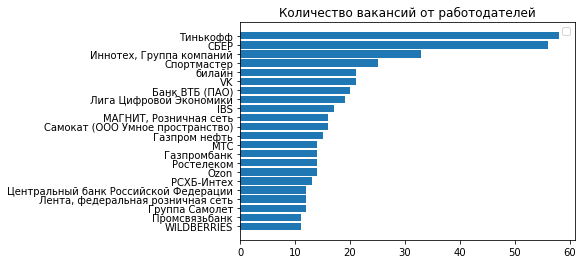

In [145]:
# выведем наибольший спрос от работодателей

#target_df.groupby('employer')['id'].count()
s = target_df.groupby('employer').size()
vac_by_empl = s[s.values>10].sort_values()
emp = vac_by_empl.index
val = vac_by_empl.values
plt.barh(emp,val)
plt.xlabel = 'Работодатели'
plt.ylabel = 'Вакансии'
plt.title('Количество вакансий от работодателей')
plt.show()

In [82]:
# попытка заполнить недостающие данные
add_info = additional[['id', 'experience','key_skills']]
add_info['exb_by_year'] = add_info['experience'].apply(get_name)
add_info.loc[:,'experience'] = add_info['experience'].apply(get_name)
#add_info.drop('experience', axis=1, inplace=True)

C:\Users\vg207\AppData\Local\Temp/ipykernel_13132/2894524284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add_info['exb_by_year'] = add_info['experience'].apply(get_name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [83]:
emp_map = {'Нет опыта':'Junior', 'От 1 года до 3 лет':'Middle', 'От 3 до 6 лет':'Senior', 'Более 6 лет': 'Senior'}
add_info.loc[:,'exb_by_year'] = add_info['exb_by_year'].map(emp_map)

In [84]:

target_df_full = pd.merge(target_df, add_info, on='id', how='left')   
target_df_full.head()

,id,name,area,salary,published_at,employer,schedule,level_exp,experience,key_skills,exb_by_year
0,70165043,Аналитик,Москва,"{'from': 100000, 'to': 150000, 'currency': 'RU...",2022-09-22T15:15:54+0300,НЬЮЭРАМЕДИА,Полный день,NaN,От 1 года до 3 лет,"[{'name': 'SQL'}, {'name': 'Power BI'}, {'name...",Middle
1,69987554,Аналитик,Москва,"{'from': 100000, 'to': None, 'currency': 'RUR'...",2022-09-21T16:38:29+0300,ВсеИнструменты.ру,Полный день,NaN,От 1 года до 3 лет,[{'name': 'Аналитический склад ума'}],Middle
2,69360960,Аналитик данных / Data Analyst (управленческая...,Москва,"{'from': 150000, 'to': 300000, 'currency': 'RU...",2022-09-22T08:27:37+0300,Carely,Удаленная работа,NaN,От 3 до 6 лет,"[{'name': 'SQL'}, {'name': 'Python'}, {'name':...",Senior
3,69982142,Аналитик по отчетности,Казань,"{'from': 100000, 'to': None, 'currency': 'RUR'...",2022-09-22T16:13:57+0300,IDF Eurasia,Полный день,NaN,От 1 года до 3 лет,"[{'name': 'SQL'}, {'name': 'Работа с базами да...",Middle
4,70167798,Аналитик данных,Санкт-Петербург,"{'from': 60000, 'to': None, 'currency': 'RUR',...",2022-09-22T15:52:52+0300,BIZNESKRUCHE,Удаленная работа,NaN,От 1 года до 3 лет,"[{'name': 'Google Sheets'}, {'name': 'Power BI...",Middle


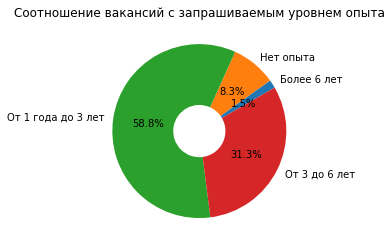

In [85]:
# соотношение вакансий с запрашиваемым уровнем опыта
exp = target_df_full.groupby('experience').size()
labels = exp.index
sizes = exp.values
fig, ax = plt.subplots()
wedge_properties = {"width":0.7}
ax.pie(sizes, labels=labels, autopct='%.1f%%', wedgeprops=wedge_properties, startangle=30)
#ax.legend(labels, loc='lower left')
plt.title('Соотношение вакансий с запрашиваемым уровнем опыта')
plt.show()

In [86]:
len(target_df_full['salary'].isnull())

2000

In [87]:
def get_salary(cell):
    if cell is None:
        return 0
    else:
        from_sal = cell['from']
        to_sal = cell['to']
        if to_sal is None:
            salary = from_sal
        else:
            salary = to_sal
        return salary

def get_salary_from(cell):
    if cell is None:
        return 0
    else:
        from_sal = cell['from']
        to_sal = cell['to']
        if from_sal is None:
            if to_sal is None:
                salary=0
            else:
                salary = to_sal
        else:
            salary = from_sal
        return salary
    
def get_curr(cell):
    return cell['currency']
    
    

In [88]:
d = {'from': None, 'to': 100, 'currency': 'RUR'}
get_salary_from(d)

100

In [89]:
target_df_full.loc[:,'salary_from'] = target_df_full['salary'].apply(get_salary_from)
target_df_full.loc[:,'salary_to'] = target_df_full['salary'].apply(get_salary)

In [90]:
target_df_full.drop('salary', inplace=True, axis = 1)

In [91]:
target_df_full.head()

,id,name,area,published_at,employer,schedule,level_exp,experience,key_skills,exb_by_year,salary_from,salary_to
0,70165043,Аналитик,Москва,2022-09-22T15:15:54+0300,НЬЮЭРАМЕДИА,Полный день,NaN,От 1 года до 3 лет,"[{'name': 'SQL'}, {'name': 'Power BI'}, {'name...",Middle,100000,150000
1,69987554,Аналитик,Москва,2022-09-21T16:38:29+0300,ВсеИнструменты.ру,Полный день,NaN,От 1 года до 3 лет,[{'name': 'Аналитический склад ума'}],Middle,100000,100000
2,69360960,Аналитик данных / Data Analyst (управленческая...,Москва,2022-09-22T08:27:37+0300,Carely,Удаленная работа,NaN,От 3 до 6 лет,"[{'name': 'SQL'}, {'name': 'Python'}, {'name':...",Senior,150000,300000
3,69982142,Аналитик по отчетности,Казань,2022-09-22T16:13:57+0300,IDF Eurasia,Полный день,NaN,От 1 года до 3 лет,"[{'name': 'SQL'}, {'name': 'Работа с базами да...",Middle,100000,100000
4,70167798,Аналитик данных,Санкт-Петербург,2022-09-22T15:52:52+0300,BIZNESKRUCHE,Удаленная работа,NaN,От 1 года до 3 лет,"[{'name': 'Google Sheets'}, {'name': 'Power BI...",Middle,60000,60000


In [92]:
# круговая диаграмма с соотношением вакансий с зарплатами и без зарплаты
target_df_full[(target_df_full['salary_from']==0) and (target_df_full['salary_to']==0)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [93]:
target_df_full.isna().mean()

id              0.0000
name            0.0000
area            0.0000
published_at    0.0000
employer        0.0000
schedule        0.0000
level_exp       0.8905
experience      0.0000
key_skills      0.0000
exb_by_year     0.0000
salary_from     0.0000
salary_to       0.0000
dtype: float64

In [94]:
#sk = [{'name': 'Статистический анализ'}, {'name': 'fsdfd'}]

In [95]:

def get_skills(cell):
    d = []
    for el in cell:
#        print(el)
#        print(el['name'])
        d.append(el['name'])
    return d
        #d.append(cell.name[])

In [96]:
#target_df_full['skills'] = 
target_df_full['skills'] = target_df_full['key_skills'].apply(get_skills)

In [97]:
target_df_full.head()

,id,name,area,published_at,employer,schedule,level_exp,experience,key_skills,exb_by_year,salary_from,salary_to,skills
0,70165043,Аналитик,Москва,2022-09-22T15:15:54+0300,НЬЮЭРАМЕДИА,Полный день,NaN,От 1 года до 3 лет,"[{'name': 'SQL'}, {'name': 'Power BI'}, {'name...",Middle,100000,150000,"[SQL, Power BI, Python, PostgreSQL, Анализ дан..."
1,69987554,Аналитик,Москва,2022-09-21T16:38:29+0300,ВсеИнструменты.ру,Полный день,NaN,От 1 года до 3 лет,[{'name': 'Аналитический склад ума'}],Middle,100000,100000,[Аналитический склад ума]
2,69360960,Аналитик данных / Data Analyst (управленческая...,Москва,2022-09-22T08:27:37+0300,Carely,Удаленная работа,NaN,От 3 до 6 лет,"[{'name': 'SQL'}, {'name': 'Python'}, {'name':...",Senior,150000,300000,"[SQL, Python, Tableau, Data Analysis, Power BI..."
3,69982142,Аналитик по отчетности,Казань,2022-09-22T16:13:57+0300,IDF Eurasia,Полный день,NaN,От 1 года до 3 лет,"[{'name': 'SQL'}, {'name': 'Работа с базами да...",Middle,100000,100000,"[SQL, Работа с базами данных, Управленческая о..."
4,70167798,Аналитик данных,Санкт-Петербург,2022-09-22T15:52:52+0300,BIZNESKRUCHE,Удаленная работа,NaN,От 1 года до 3 лет,"[{'name': 'Google Sheets'}, {'name': 'Power BI...",Middle,60000,60000,"[Google Sheets, Power BI, SQL, Разработка инст..."


In [98]:
# Круговая диаграмма - подготовка данных
pie = target_df_full.groupby('schedule')['id'].count()
#pie.first()
pie

schedule
Гибкий график         66
Полный день         1551
Сменный график         6
Удаленная работа     377
Name: id, dtype: int64

In [99]:
pie.index

Index(['Гибкий график', 'Полный день', 'Сменный график', 'Удаленная работа'], dtype='object', name='schedule')

<AxesSubplot:xlabel='schedule'>

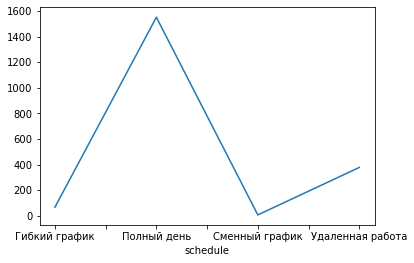

In [100]:
pie.plot()

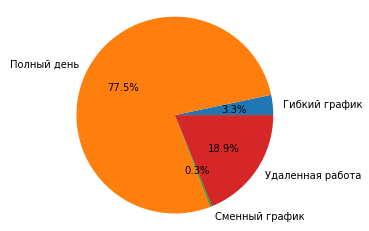

In [101]:
# Круговая диаграмма
labels = pie.index
fig1, ax1 = plt.subplots()
ax1.pie(pie, labels=labels, autopct='%1.1f%%') # №, explode = explode)
ax1.axis('equal')  
plt.show()

#вывести заголовок


In [102]:
# получим список скилов для облака тегов
lst = sum(target_df_full['skills'], [])

# посмотрим, сколько навыков набралось всего (неуникальных)
#list_skills = target_df_full.skills

In [105]:
!pip install wordcloud

In [106]:
from wordcloud import WordCloud

In [107]:
# преобразуем словарь в текст
s = ' '.join(lst)
#''.join('{}{}'.format(key, val) for key, val in lst.items())

In [108]:
!pip install corpus


  Created wheel for corpus: filename=Corpus-0.4.2-py3-none-any.whl size=88797 sha256=36cf0ced76edecda984afb1e0a71fe56def574e7449b95cf3c667c8e2ca9118a
  Stored in directory: c:\users\vg207\appdata\local\pip\cache\wheels\73\b1\96\d08538d62b0ad5b467fe9080873b4dbfe011044d687656939c
Successfully built corpus


In [120]:
#from nltk.corpus import stopwords
# сохраняем список с русскими стоп-cловами в переменную stop_words
#stop_words = stopwords.words('russian')

In [129]:
stop_words = open('stop-ru.txt', 'r', encoding='utf8')
stop_words = stop_words.read()
stop_words = stop_words.split('\n')

In [130]:
clear_data=[]
for i in lst:
    if(i not in stop_words):
        clear_data.append(i)

In [133]:
len(clear_data)

12115

In [127]:
big_string=''
for i in range(len(clear_data)):
    big_string+=(clear_data[i]+' ')

(-0.5, 599.5, 299.5, -0.5)

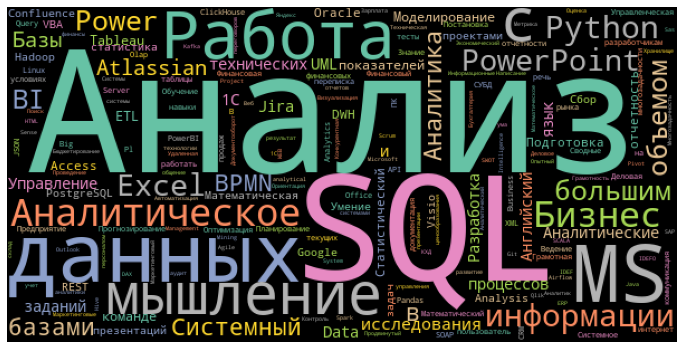

In [139]:
# Генерируем облако слов и сохраняем в переменной cloud
# cloud = WordCloud(max_words=30).generate(big_string)
cloud = WordCloud(width = 600, height = 300, random_state=1, background_color='black', colormap='Set2', collocations=False).generate(big_string)
# Выводим облако слов на экран
#plt.imshow(cloud)
plt.figure(figsize=(12,12))
plt.imshow(cloud)
#plt.axis('off')
# Отключаем отображение осей
plt.axis('off')

In [140]:
import seaborn as sns

In [141]:
emp_map = {'Нет опыта':'Junior', 'От 1 года до 3 лет':'Middle', 'От 3 до 6 лет':'Senior', 'Более 6 лет': 'Senior'}
add_info.loc[:,'exb_by_year'] = add_info['exb_by_year'].map(emp_map)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [142]:
s = target_df_full.groupby('area').size()
vac_by_cities = s[s.values>10]

<AxesSubplot:ylabel='area'>

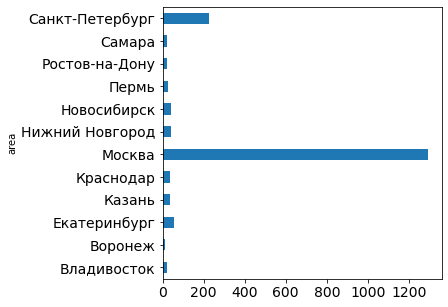

In [143]:
vac_by_cities.plot(x='index', y='values', kind='barh', fontsize=14, figsize=(5,5))

# столбиковая диаграмма
# подписать 
# отсортировать!
# заголовок
# название осей


In [63]:
# корреляционная матрица - не факт
df_corr = target_df_full[['area', 'experience', 'exb_by_year']]
df_corr.corr()

""


In [ ]:
# график в логарифмической шкале
# ? график - столбиковая диаграмма, с широкими столбцами, слева - кол-во вакансий, справа - среднее по зарплате: столбик - колв-во 
# линия - зарплата

# 2 вариант: boxplot - по городам и уровню зарплаты. seaborn. 
# 
# типы графиков из занятий (категориальные графики)
